## Esercitazione 6  del    27 Marzo 2023 


## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=1,..,10.
Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
condizionato per tutti i valori di q assegnati;

In [23]:
import numpy as np
import sympy as sym
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
import numpy.linalg as npl
import scipy as sp

q=sym.symbols('q')
p=sym.symbols('p')

f=-p+sym.sqrt(p**2+q)

df=sym.diff(f,q,1)
print( "Derivata di f : {}".format(df))

fp=f.subs(p,10**5)
dfp=df.subs(p,10**5)

i=np.arange(1,11,1)
vet_q=10.0**(-i)
pnum=10**5

df_numerica= lambdify(q,dfp,np) 
f_numerica=lambdify(q,fp,np)

condizionamento=np.abs(df_numerica(vet_q)*vet_q/f_numerica(vet_q))
print(condizionamento)

sol=f_numerica(vet_q)
print("soluzione ", sol)
print("q =",vet_q)
print("Lo spacing per {}  vale {} ".format(pnum**2,np.spacing(pnum**2)))
#Il problema è malcondizionato per valori di q minori di 1e-6, infatti esplode per valori che rendono nullo il denominatore.
#Il denominatore per valori più  piccoli dello spacing nel sottointervallo dell'asse reale a cui appartiene p^2 si annulla,
# dando luogo ad un valore x=-p+sqrt(p^2)=0. Infatti lo spacing vale  1.9073486328125e-06  e per valori di q più piccoli 
#dello spacing sqrt(p^2+q) viene approssimato a sqrt(p^2). 

Derivata di f : 1/(2*sqrt(p**2 + q))
[0.99999239 0.99999239 1.00174164 1.01058054 1.14532461 0.34359738
        inf        inf        inf        inf]
soluzione  [5.00003807e-07 5.00003807e-08 4.99130692e-09 4.94765118e-10
 4.36557457e-11 1.45519152e-11 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
q = [1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09 1.e-10]
Lo spacing per 10000000000  vale 1.9073486328125e-06 


C:\Users\damiana\AppData\Local\Temp/ipykernel_19116/3595637498.py:26: RuntimeWarning: divide by zero encountered in true_divide
  condizionamento=np.abs(df_numerica(vet_q)*vet_q/f_numerica(vet_q))


## Esercizio 2
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [ ]:
#Calcolo della norma 1
def mynorma1(B):
    c=np.sum(np.abs(B),axis=0)  #equivale a sommare gli elementi di tutte le righe 
    #(che equivale a fare la somma degli elementi di ogni colonna)
    n1=np.max(c)
    return n1


In [24]:
#Calcolo della norma infinito
def mynormainf(B):
    c=np.sum(np.abs(B),axis=1)  #equivale a sommare gli elementi di tutte le colonne
    #(che equivale a fare la somma degli elementi di ogni riga)
    ninf=np.max(c)
    return ninf 

In [25]:
B=np.array([[2.0],[3],[4],[5]])
norma1=mynorma1(B)
normainf=mynormainf(B)
print("mynorma1=", norma1)
print("norma 1 con numpy.linalg.norm ", npl.norm(B,1))#Calcolo della norma 1
print("mynormainf=", normainf)
print("norma inf con numpy.linalg.norm ", npl.norm(B,np.inf))

mynorma1= 14.0
norma 1 con numpy.linalg.norm  14.0
mynormainf= 5.0
norma inf con numpy.linalg.norm  5.0


La stessa implementazione vale anche per calcolare la norma delle matrici.
NB. Il vettore deve essere dato sotto forma di array 2d, con una delle dimensioni uguale ad 1.

In [27]:
B=np.array([[2.0,6.0],[3,-2.0],[4,7],[5,-11]])
norma1=mynorma1(B)
normainf=mynormainf(B)
print(B)
print("mynorma1=", norma1)
print("norma 1 con numpy.linalg.norm ", npl.norm(B,1))#Calcolo della norma 1
print("mynormainf=", normainf)
print("norma inf con numpy.linalg.norm ", npl.norm(B,np.inf))


[[  2.   6.]
 [  3.  -2.]
 [  4.   7.]
 [  5. -11.]]
mynorma1= 26.0
norma 1 con numpy.linalg.norm  26.0
mynormainf= 16.0
norma inf con numpy.linalg.norm  16.0


## Esercizio 3
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [28]:
def mynorma2(A):
    M=np.dot(A.T,A)
    autovalori=np.linalg.eigvals(M)
    print(autovalori)
    n2=np.sqrt(np.max(autovalori))
    return n2

In [29]:
A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])
norma2=mynorma2(A)
print(np.linalg.det(A))
print("mynorma 2",norma2)
print("norma 2 con numpy.linalg.norm ", npl.norm(A,2))

[8.20156824e+01 1.82343176e+01 1.03206384e-15]
0.0
mynorma 2 9.056251013341882
norma 2 con numpy.linalg.norm  9.056251013341878


## Esercizio 4 
Implementare il calcolo dell'indice di condizionamento in norma 2 di una matrice A come rapporto tra la radice dell'autovalore massimo di $A^TA$ e la radice dell'autovalore minimo di $A^TA$.

In [33]:
def mycond2(A):
    M=np.dot(A.T,A)
    autovalori=np.linalg.eigvals(M)
    print(autovalori)
    c2=np.sqrt(np.max(autovalori))/np.sqrt(np.min(autovalori))
    return c2

In [35]:
A=np.array([[3,6,2],[14,2,1],[7,4,3]])
cond2=mycond2(A)
print("my cond 2  uguale a {:e}".format(cond2))
cond2p=np.linalg.cond(A,2)
print("condizionamento in norma 2 con numpy {:e}".format(cond2p))


[286.75262522  35.84646974   1.40090504]
my cond 2  uguale a 1.430703e+01
condizionamento in norma 2 con numpy 1.430703e+01


## Esercizio 5
- Costruire la matrice di vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma 1 senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1)
- Costruire il termine noto perturbato ottenuto perturbando solo la componente 0-esima del termine noto di una quantità pari a 0.025.
- Risolvere il sistema con termine noto pertubato.
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?


In [36]:
x=np.arange(1.0,7.0)
A=np.vander(x, increasing=True)
print(A)
mycond=mynorma1(A)*mynorma1(np.linalg.inv(A))
print("mycond {:e}".format(mycond))
condp=np.linalg.cond(A,1)
print("condizionamento in norma 1 con numpy {:e}".format(condp))

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03 7.776e+03]]
mycond 1.281105e+06
condizionamento in norma 1 con numpy 1.281105e+06


In [37]:
#Costruisco il termine noto in maniera tale che la soluzione sia il vettore unitario
b=np.sum(A,axis=1).reshape(6,1) #Calcolo la somma degli elementi di ogni riga 
#Con la scelta di questo termine noto la soluzione esatta è il vettore di tutti 1.
print(b)

[[6.000e+00]
 [6.300e+01]
 [3.640e+02]
 [1.365e+03]
 [3.906e+03]
 [9.331e+03]]


In [50]:
bp=b.copy()
bp[0]=bp[0]+0.025  #Perturbo l'elemento di posizione 0 del termine noto di una quantitù pari a 0.025
errore_dati=np.linalg.norm(bp-b,np.inf)/np.linalg.norm(b,np.inf)
print("errore dati ",errore_dati)

errore dati  0.010729613733905541


In [53]:
xesatta= np.ones((6,1))  #Soluzione esatta
xp=sp.linalg.solve(A,bp)
print("Soluzione esatta sistema senza perturbazione \n ",xesatta)
print("Soluzione sistema con termine noto perturbato\n ",xp)
errore_soluzione=np.linalg.norm(xp-xesatta,np.inf)/np.linalg.norm(xesatta,np.inf)
print("errore soluzione ",errore_soluzione)
#Ad un errore relativo sui dati pari a 2.67 e-06, corrisponde un errore relativo sulla soluzione di 0.2175.
#Questo dipende dal fatto che il problema della soluzione del sistema lineare con la matrice A come nell'esercizio 
#è mal condizionato, quindi piccole perturbazioni sui dati vengono amplificate sulla soluzione
#l'elevato indice di condizionamento della matrice A, che abbiamo visto essere 1.281105e+06 conferma la precedente.
#Infatti abbiamo detto a lezione che l'indice di condizionamento della matrice A rappresenta un fattore di amplificazione
#sulla soluzione di piccoli errori sui dati


Soluzione esatta sistema senza perturbazione 
  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Soluzione sistema con termine noto perturbato
  [141502.73746348 -26967.84329661   1283.5379461 ]
errore soluzione  169753.11870619055


## Esercizio 6

Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [48]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl

#Esempi di sistemi malcondizionati


A=np.array([[6, 63, 662.2],[63, 662.2, 6967.8],[662.2, 6967.8, 73393.5664]])
b=np.array([1.1, 2.33, 1.7])

KA= npl.cond(A,np.inf)
print("Indice di condizionamento di A {:e}".format(KA))
x=spl.solve(A,b)

#perturbare la matrice
 
A1=A.copy()
A1[0,0]=A[0,0]+0.01
x_per=spl.solve(A1,b)


#Errore relativo sui dati
err_dati=npl.norm(A-A1,np.inf)/npl.norm(A,np.inf)

print("Errore relativo sui dati ", err_dati)
print("Errore relativo sui dati  in percentuale ", err_dati*100,"%")

err_rel_sol=npl.norm(x_per-x,np.inf)/npl.norm(x,np.inf)
print("Errore relativo sulla soluzione ", err_rel_sol)
print("Errore relativo sulla soluzione  in percentuale ", err_rel_sol*100,"%")
#Ad un errore relativo sui dati pari a 1.23 e-07, corrisponde un errore relativo sulla soluzione di 0.9995.
#Questo dipende dal fatto che il problema della soluzione del sistema lineare con la matrice A come nell'esercizio 
#è mal condizionato, quindi piccole perturbazioni sui dati vengono amplificate sulla soluzione
#l'elevato indice di condizionamento della matrice A, che abbiamo visto essere 1.975302e+010 conferma la precedente affermazione.
#Infatti abbiamo detto a lezione che l'indice di condizionamento della matrice A rappresenta un fattore di amplificazione
#sulla soluzione di piccoli errori sui dati

Indice di condizionamento di A 1.975302e+10
Errore relativo sui dati  1.2342088165597937e-07
Errore relativo sui dati  in percentuale  1.2342088165597937e-05 %
Errore relativo sulla soluzione  0.9995081547933965
Errore relativo sulla soluzione  in percentuale  99.95081547933965 %


## Esercizio 7
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

In [57]:
n=4
A=spl.hilbert(4)
print(A)
condA=np.linalg.cond(A,np.inf)
print("Indice di condizionamento di A {:e}".format(condA))

b=np.array([1,1,1,1])

x= spl.solve(A,b)


db=np.array([0.01, -0.01, 0.01, -0.01])
bp=b+db

xp=spl.solve(A,bp)

err_dati= npl.norm(db,np.inf)/npl.norm(b,np.inf)  
print("Errore relativo sui dati ", err_dati)
print("Errore relativo sui dati  in percentuale", err_dati*100,"%")

err_rel_sol=npl.norm(x-xp,np.inf)/npl.norm(x,np.inf) 
print("Errore relativo sulla soluzione", err_rel_sol)
print("Errore relativo sulla soluzione  in percentuale", err_rel_sol*100,"%")
#Ad un errore relativo sui dati pari a 0.01 (che in percentuale è pari all' 1%) , corrisponde un errore relativo 
#sulla soluzione di 0.7566 (che in percentuale è pari al 75%).
#Questo dipende dal fatto che il problema della soluzione del sistema lineare con la matrice A come nell'esercizio 
#è mal condizionato, quindi piccole perturbazioni sui dati vengono amplificate sulla soluzione
#l'elevato indice di condizionamento della matrice A, che abbiamo visto essere 2.837500e+04 conferma la precedente affermazione.
#Infatti abbiamo detto a lezione che l'indice di condizionamento della matrice A rappresenta un fattore di amplificazione
#sulla soluzione di piccoli errori sui dati

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]
Indice di condizionamento di A 2.837500e+04
Errore relativo sui dati  0.01
Errore relativo sui dati  in percentuale 1.0 %
Errore relativo sulla soluzione 0.7566666666666719
Errore relativo sulla soluzione  in percentuale 75.6666666666672 %


## Esercizio 8   
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.

##N.B: Questo esercizio sarà ripreso nelle esercitazioni di potenziamento

In [59]:
def esp_taylor(x,N):
   
    r=x
    fattoriale=1
    esponential=1+r;
    for i in range(2,N+1):
        r=r*x
        fattoriale=fattoriale*i;
        esponential=esponential+r/fattoriale;
    return esponential
 
def esp_taylor_stabile(x,N):
    
    if x<0:
        x=abs(x)
        r=x
        fattoriale=1
        esponential=1+r;
        for i in range(2,N+1):
            r=r*x
            fattoriale=fattoriale*i;
            esponential=esponential+r/fattoriale;
    
        return 1/esponential
    
    else: 

        r=x
        fattoriale=1
        esponential=1+r;
        for i in range(2,N+1):
            r=r*x
            fattoriale=fattoriale*i;
            esponential=esponential+r/fattoriale;
        return esponential

[7.23266687e-09 5.77518674e-10 1.47727772e-10 1.26080974e-11
 7.25031545e-13 2.13688307e-13 1.43963293e-14 8.36228458e-16
 4.10175011e-16 3.01789907e-16 0.00000000e+00 1.63371290e-16
 2.40403756e-16 3.53758398e-16 5.20561767e-16 1.91503972e-16
 0.00000000e+00 6.22013862e-16 1.52550741e-16 0.00000000e+00
 3.30327965e-16]


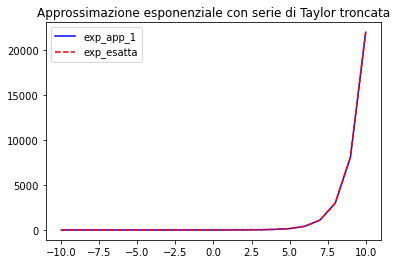

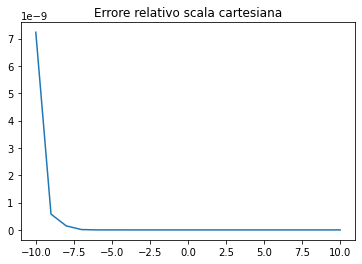

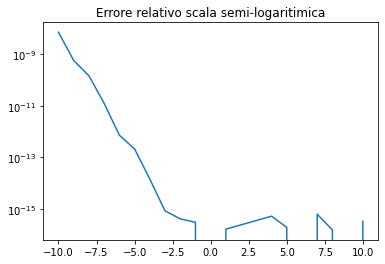

[1.49257138e-16 2.19634530e-16 1.61598056e-16 7.13383232e-16
 0.00000000e+00 2.57455791e-16 3.78850770e-16 2.78742819e-16
 2.05087505e-16 1.50894954e-16 0.00000000e+00 1.63371290e-16
 2.40403756e-16 3.53758398e-16 5.20561767e-16 1.91503972e-16
 0.00000000e+00 6.22013862e-16 1.52550741e-16 0.00000000e+00
 3.30327965e-16]


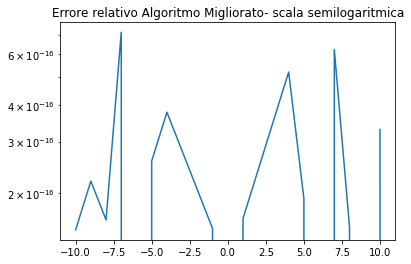

In [60]:
import numpy as np
import matplotlib.pyplot as plt
 

a=-10               
b=10                
ncampio=21
N=100

xc= np.linspace(a,b,ncampio)
exp_es=np.exp(xc); #esponenziale esatto


exp_app=np.zeros((ncampio,)); 
nt=np.zeros((ncampio,));     #indice n della serie

for i in range(ncampio):
    exp_app[i]= esp_taylor(xc[i],N);


err_rel=np.abs(exp_app-exp_es)/np.abs(exp_es)

print(err_rel)
plt.plot(xc,exp_app,'b-',xc,exp_es,'r--')
plt.title('Approssimazione esponenziale con serie di Taylor troncata')
plt.legend(['exp_app_1','exp_esatta'])
plt.show()



plt.plot(xc,err_rel)
plt.title("Errore relativo scala cartesiana")
plt.show()


plt.plot(xc,err_rel)
plt.yscale("log")
plt.title("Errore relativo scala semi-logaritimica")
plt.show()

#Si nota che l'errore relativo risulta più alto nel caso di esponente negativo, perchè lo sviluppo in serie
#presenta termini a segno alterno, e sappiamo che in situazioni particolari la somma tra numeri a segno alterno
#può provocare la cancellazione di cifre significative e produrre quindi un algoritmo instabile
'''
--------------------------------------------------------------------------
come migliorare andamento errore relativo
--------------------------------------------------------------------------
'''
#Pe realizzare un aglrotimo stabile si considera il fatto che exp(-x)= 1/exp(x).
#Si calcola quindi lo sviluppo in serie troncato ad n termini di exp(abs(x)) e poi se ne considera il reciproco.

for i in range(ncampio) :
       exp_app[i]= esp_taylor_stabile(xc[i],N)
   

err_rel_2=np.abs(exp_app-exp_es)/np.abs(exp_es)
print(err_rel_2)
plt.plot(xc,err_rel_2)
plt.yscale("log")
plt.title('Errore relativo Algoritmo Migliorato- scala semilogaritmica')
plt.show()

## Esercizio 9
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

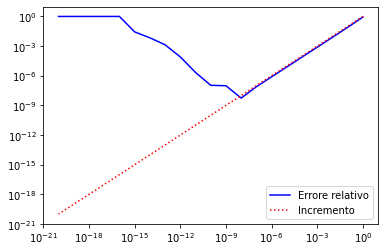

In [61]:
import numpy as np
import math
import matplotlib.pyplot as plt
k=np.arange(0,-21,-1)
h=10.0**k

des=math.cos(1);            #derivata esatta


x=1
rai=(np.sin(x+h)-np.sin(x))/h #rapporto incrementale

err_rel=np.abs(rai-des)/np.abs(des); # errore relativo


plt.plot(h,err_rel,'b-',h,h,'r:')
plt.xscale("log")
plt.yscale("log")
plt.legend(['Errore relativo', 'Incremento'])